In [1]:
import pandas as pd
from pycaret.nlp import *

In [2]:
df_train = pd.read_csv('dataset/Corona_NLP_train.csv', encoding='latin-1')
df_test = pd.read_csv('dataset/Corona_NLP_test.csv', encoding='latin-1')

In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [5]:
def sentiment_encoder(sentiment:str):
    if sentiment == 'Extremely Negative':
        return -2
    elif sentiment == 'Negative':
        return -1
    elif sentiment == 'Neutral':
        return 0
    elif sentiment == 'Positive':
        return 1
    elif sentiment == 'Extremely Positive':
        return 2
df_train['encoded_sentiment'] = df_train.apply(lambda row: sentiment_encoder(row['Sentiment']),axis=1)

In [6]:
# supervised
exp_name = setup(data = df_train, target = 'OriginalTweet', custom_stopwords=['covid', 'coronavirus', 'virus', 'pandemic', 'https', 'co'])
tuned_lda = tune_model(model = 'lda', supervised_target = 'encoded_sentiment', custom_grid=[4])

Description,Value
session_id,6180
Documents,41157
Vocab Size,36129
Custom Stopwords,True


IntProgress(value=0, description='Processing: ', max=11)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 4 | R2 : 1.0


In [7]:
tuned_lda

In [10]:
save_model(tuned_lda, 'tuned_lda_final', verbose=True)

Model Succesfully Saved


(<gensim.models.ldamodel.LdaModel at 0x7fe801325c10>, 'tuned_lda_final.pkl')

In [11]:
saved_lda = load_model('tuned_lda_final')

Model Sucessfully Loaded


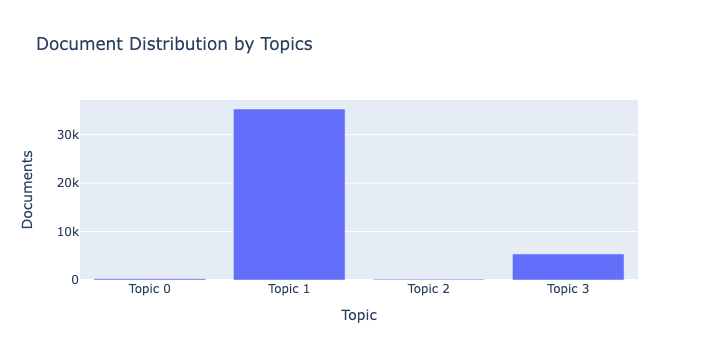

In [12]:
plot_model(saved_lda, plot = 'topic_distribution')

In [13]:
lda_df_final = assign_model(tuned_lda)

In [14]:
%store lda_df_final

Stored 'lda_df_final' (DataFrame)


In [16]:
lda_df_final.to_csv('lda_df_final.csv')